# Car Classification -- Use ONNX for Inference (model exported from fastai)

In [ ]:
!pip install onnxruntime

In [16]:
import onnxruntime as rt
from PIL import Image
import numpy as np

加载模型

In [4]:
sess = rt.InferenceSession("models/car_classification_model.onnx")

In [7]:
inp = sess.get_inputs()

In [10]:
inpname = inp[0].name

In [12]:
inpname

'image_1_3_224_224'

读取并查看图片

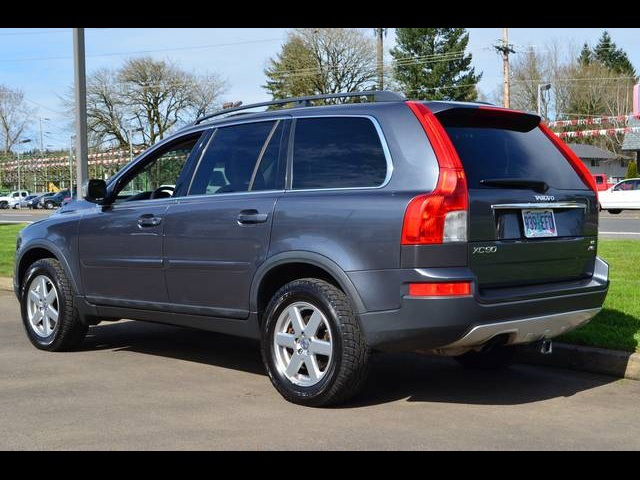

In [17]:
raw_img = Image.open("example_images/00028.jpg")
raw_img

图片预处理为 224-224 大小后转 shape 为 1_3_224_224 并 normalize 

In [22]:
img = np.transpose(np.array(raw_img.resize((224,224)), dtype="float32"),(2,0,1))[np.newaxis,:]/255

获得预测结果

In [23]:
pred_onx = sess.run(None, {inpname: img})[0]

取最大值的下标，即为分类 id

In [26]:
np.argmax(pred_onx)

1